# Genie age group overview

I want to create an overview of my clinical data, preferably as mosaic plots.

## Setup

In [1]:
library("ggplot2")
library('ggmosaic')
library(dplyr, warn.conflicts = FALSE)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘ggmosaic’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”


## Get data

In [2]:
# Clinical reference
clean_clin <- read.csv("../../derived_data/genie_v15/clean_reference.csv", header=TRUE, stringsAsFactors=FALSE)

# pathogens with a gene-weight of >=0.75
#pathogen_75 <- read.csv("../../derived_data/genie_v15/pathogen_filtered_75.csv", header=TRUE, stringsAsFactors=FALSE)

# pathogens with a gene-weight of >=0.50
pathogen_50 <- read.csv("../../derived_data/genie_v15/pathogen_filtered_50.csv", header=TRUE, stringsAsFactors=FALSE)

# Some annotation information that we want to visualise
annotation <- read.table(file = "../../data/annotation/Census_all_driver_genes.tsv", sep="\t", quote="", header=TRUE)

In [3]:
# Sanity check
dim(clean_clin)
#head(clean_clin)

# Sanity check
#dim(pathogen_75)
#head(pathogen_75)

dim(pathogen_50)
#head(pathogen_50)

dim(annotation)
# head(annotation)

[1] 198041     16

[1] 511408     23

[1] 743  20

## Annotation

In [4]:
table(annotation$Role.in.Cancer)


                             "oncogene, fusion" "oncogene, TSG, fusion" 
                     41                     140                      32 
        "oncogene, TSG"           "TSG, fusion"                  fusion 
                     41                      62                     135 
               oncogene                     TSG 
                    107                     185 

In [5]:
annotation$Role.in.Cancer[annotation$Role.in.Cancer=='"oncogene, fusion"'] <- 'oncogene'
annotation$Role.in.Cancer[annotation$Role.in.Cancer=='"TSG, fusion"'] <- 'TSG'
annotation$Role.in.Cancer[annotation$Role.in.Cancer=='"oncogene, TSG, fusion"'] <- 'TSG/oncogene'
annotation$Role.in.Cancer[annotation$Role.in.Cancer=='"oncogene, TSG"'] <- 'TSG/oncogene'
annotation$Role.in.Cancer[annotation$Role.in.Cancer=='fusion'] <- NA
annotation$Role.in.Cancer[annotation$Role.in.Cancer==''] <- NA

In [6]:
table(annotation$Role.in.Cancer)


    oncogene          TSG TSG/oncogene 
         247          247           73 

## Data overview

In [7]:
# What columns are available for my clinical data?
#colnames(clean_clin)

# We don't want rows with A values in them
clean_clin <- na.omit(clean_clin)

# age_groups should be a factor
clean_clin$age_group <- factor(clean_clin$age_group, levels = c("Child","Young","Middle Aged", "Old"))

# How many datapoints are there in each age grup?
table(clean_clin$age_group)


      Child       Young Middle Aged         Old 
       3016       15069       67850       71082 

In [8]:
# We rename the 'Smbol' column to 'Hugo_Smbol' in the annotation data 
annotation <- rename(annotation, Hugo_Symbol = Gene.Symbol)
# And choose only the Hugo_symbol and Role.in.Cancer columns
annotation <- annotation[c('Hugo_Symbol', 'Role.in.Cancer')]

# So that we can add the Role.in.Cancer colmn to our pathogen data, merging by the Hugo_Symbol columns
pathogen_50 <- merge(pathogen_50, annotation, by  = "Hugo_Symbol")

# We set age_group to be a factor in pathogen_50 with the same levels as before
pathogen_50$age_group <- factor(pathogen_50$age_group, levels=c('Child', 'Young', 'Middle Aged', 'Old'))

# Then we look at the new dataframe
head(pathogen_50)

,Hugo_Symbol,sample_id,SIFT_Prediction,Polyphen_Prediction,Variant_Classification,gnomAD_AMR_AF,gnomAD_NFE_AF,Population,Pathogen,patient_id,⋯,age,oncotree_code,sample_type,sequence_assay_ID,cancer_type,sample_type_detail,population,age_group,age_interval,Role.in.Cancer
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>
1,ABL1,GENIE-DFCI-038007-61387,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-DFCI-038007,⋯,34,IDC,Primary,DFCI-ONCOPANEL-2,Breast Cancer,Primary tumor,AMR,Young,[30-35[,oncogene
2,ABL1,GENIE-UCSF-395049-99220T,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-UCSF-395049,⋯,70,UEC,Metastasis,UCSF-IDTV5-TO,Endometrial Cancer,Distant organ metastasis,AMR,Old,[70-75[,oncogene
3,ABL1,GENIE-MSK-P-0028304-T01-IM6,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-MSK-P-0028304,⋯,69,STAD,Metastasis,MSK-IMPACT468,Esophagogastric Cancer,Metastasis site unspecified,AMR,Old,[65-70[,oncogene
4,ABL1,GENIE-UHN-573746-ARC1,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-UHN-573746,⋯,63,BLCA,Primary,UHN-48-V1,Bladder Cancer,Primary tumor,AMR,Middle Aged,[60-65[,oncogene
5,ABL1,GENIE-MSK-P-0025952-T03-IM7,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-MSK-P-0025952,⋯,78,COAD,Primary,MSK-IMPACT505,Colorectal Cancer,Primary tumor,AMR,Old,[75-80[,oncogene
6,ABL1,GENIE-DFCI-002243-1603,deleterious,probably_damaging,Missense_Mutation,NA,NA,AMR,1,GENIE-DFCI-002243,⋯,67,LUAD,Primary,DFCI-ONCOPANEL-1,Non-Small Cell Lung Cancer,Primary tumor,AMR,Old,[65-70[,oncogene


## Plots

### Clinical

             sex
age_group     Female  Male
  Child         1417  1599
  Young         8161  6908
  Middle Aged  38034 29816
  Old          35497 35585

Warning message:
“The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.”
Warning message:
“The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
ℹ Please use the `transform` argument instead.”
Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
ℹ Please use `unite()` instead.
ℹ The deprecated feature was likely used in the ggmosaic package.
  Please report the issue at <https://github.com/haleyjeppson/ggmosaic>.”


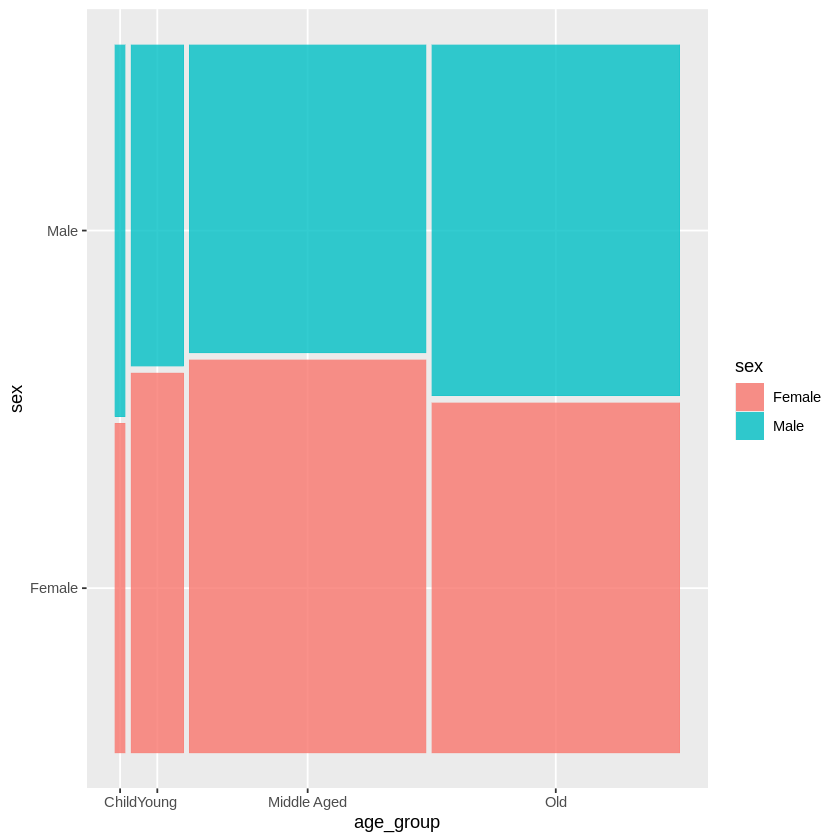

In [9]:
# We start by examining the clinical data a bit more throughly

# How is sex distributed among the age_groups?
xtabs(~ age_group + sex, data = clean_clin)

# Let's visualise it
ggplot(data = clean_clin) +
  geom_mosaic(aes(x = product(sex, age_group), fill=sex))

             race
age_group     Asian Black Native American Pacific Islander White
  Child         265   311              18               13  2409
  Young        1677  1343              55               24 11970
  Middle Aged  5266  5400             165               79 56940
  Old          3862  3825             124               57 63214

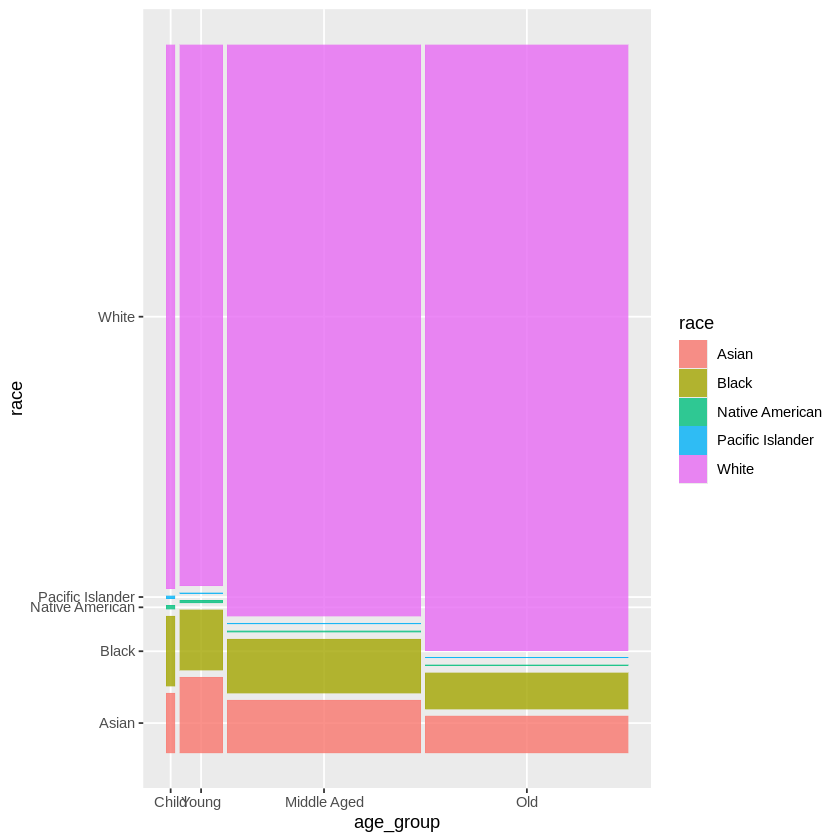

In [10]:
# Repeat for race...
xtabs(~ age_group + race, data = clean_clin)

ggplot(data = clean_clin) +
  geom_mosaic(aes(x = product(race, age_group), fill=race))

             population
age_group       AMR   NFE
  Child        3016     0
  Young       14930   139
  Middle Aged 66789  1061
  Old         70382   700

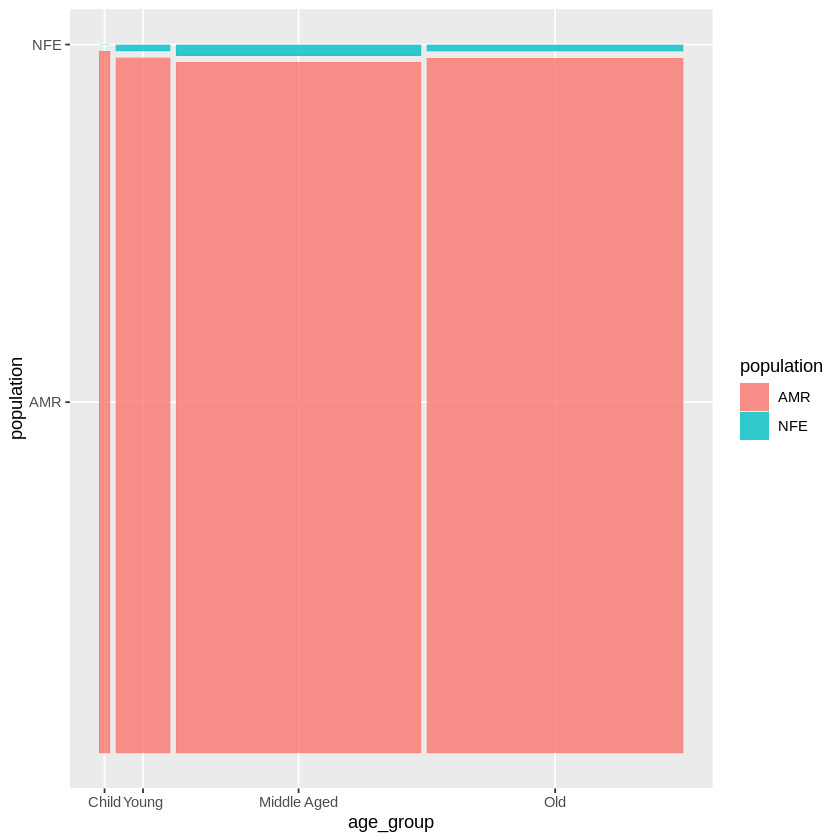

In [11]:
# ... And population
xtabs(~ age_group + population, data = clean_clin)

ggplot(data = clean_clin) +
  geom_mosaic(aes(x = product(population, age_group), fill=population))

             sample_type
age_group     Metastasis Not Applicable or Heme Not Collected Primary
  Child              456                    437            26    1637
  Young             4144                    501           369    8833
  Middle Aged      23170                   1868          2327   35716
  Old              22090                   2125          3873   36929
             sample_type
age_group     Unspecified
  Child               460
  Young              1222
  Middle Aged        4769
  Old                6065

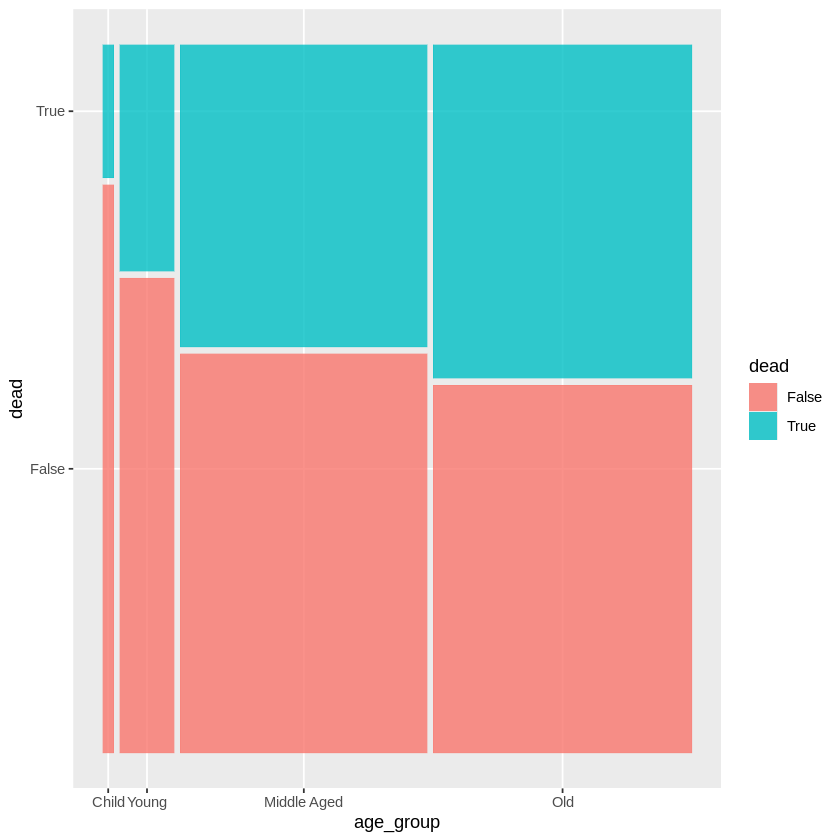

In [12]:
# ... and Sample_type
xtabs(~ age_group + sample_type, data = clean_clin)

ggplot(data = clean_clin) +
  geom_mosaic(aes(x = product(dead, age_group), fill=dead))

### Pathogen

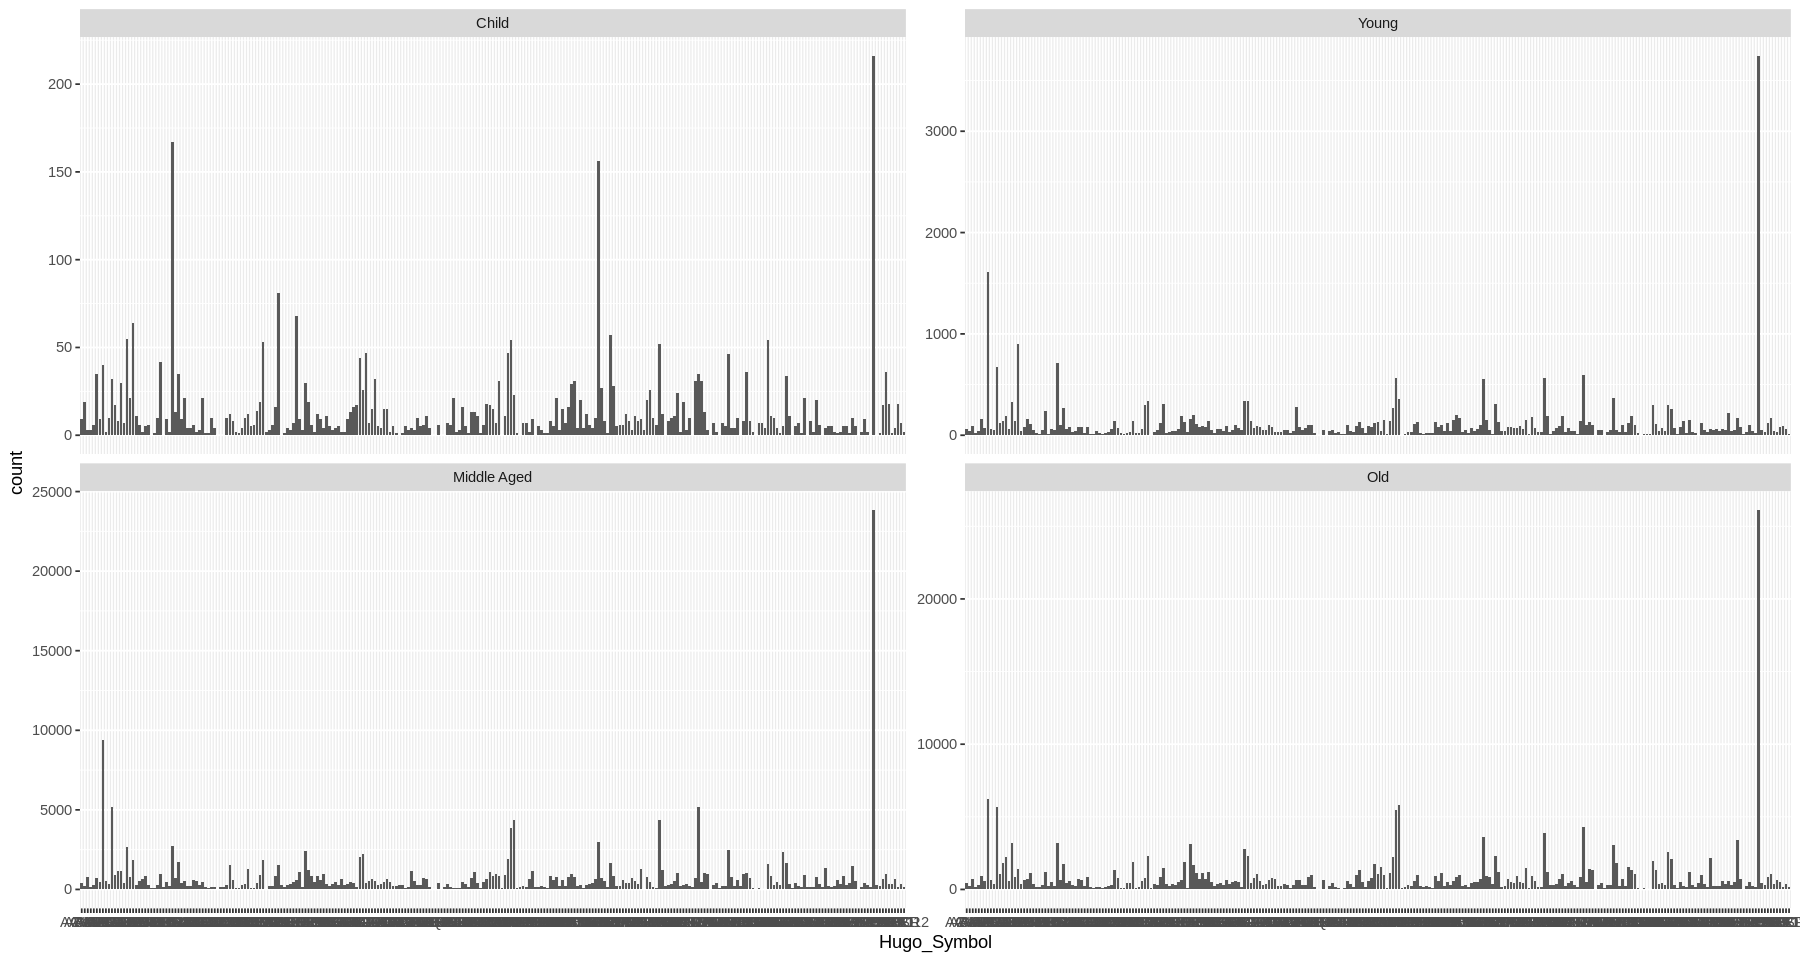

In [13]:
# Now let us look a the types of mutation across age_groups

# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

ggplot(data=pathogen_50, aes(x=Hugo_Symbol)) + geom_bar()  + 
    facet_wrap(~age_group, scales = "free_y") 

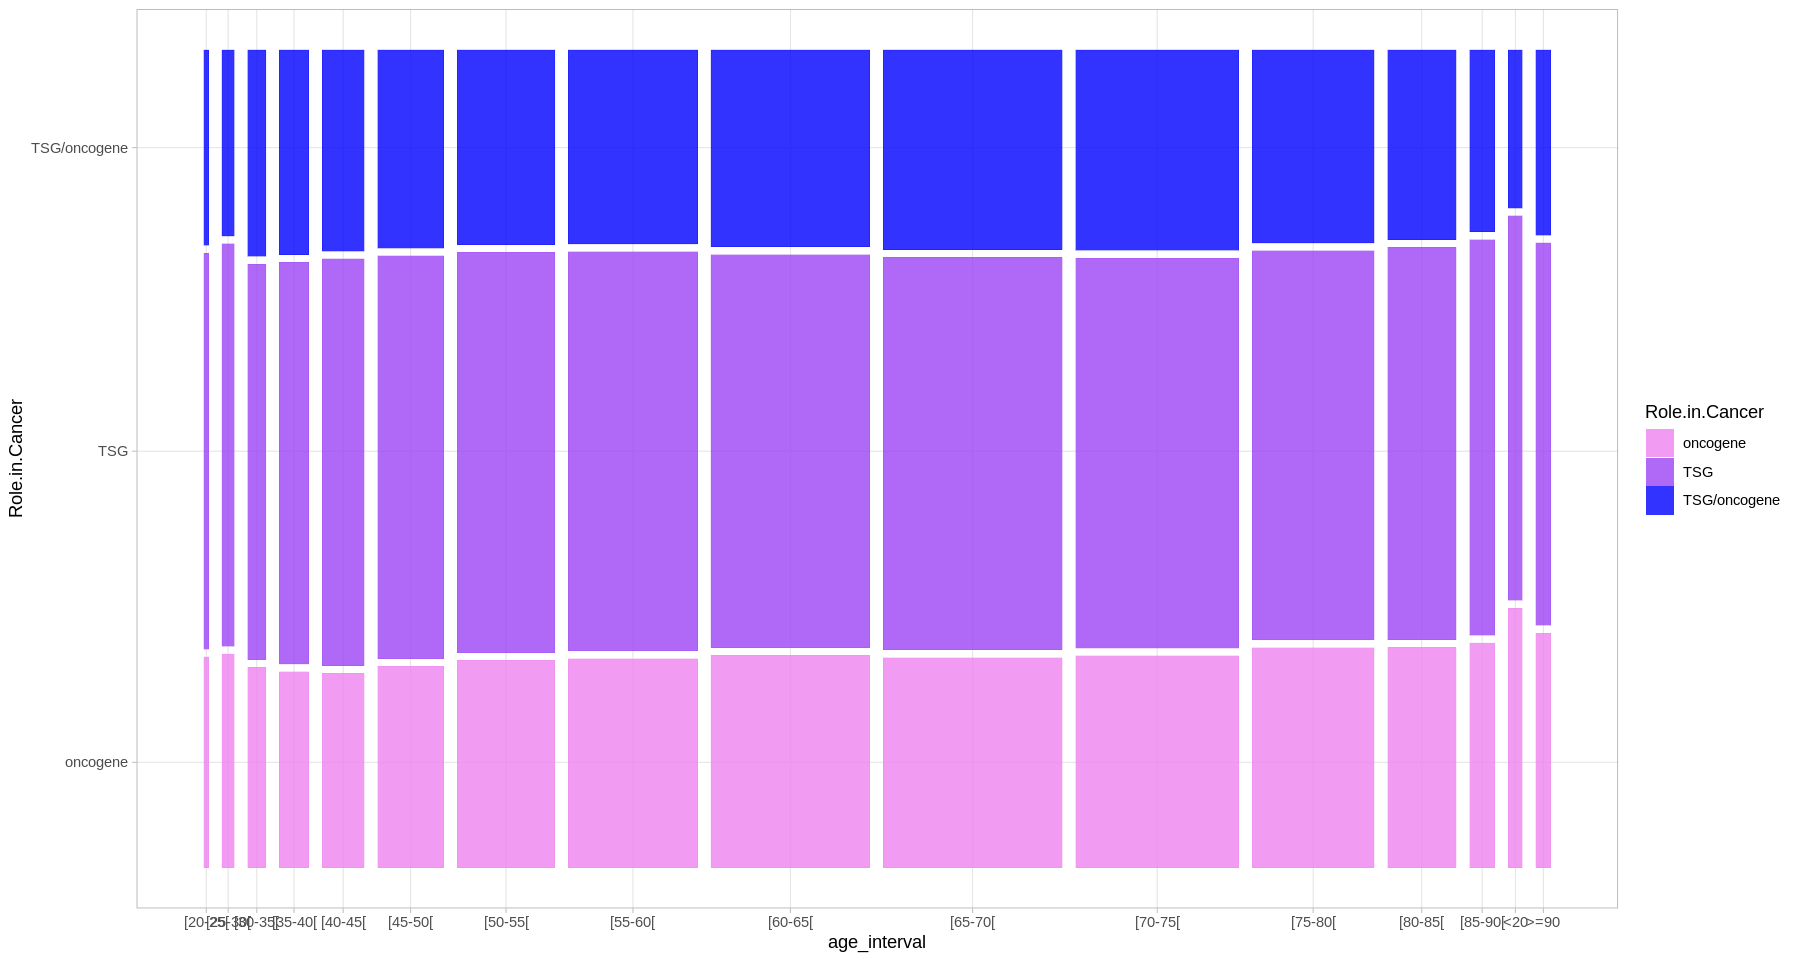

In [15]:
ggplot(data = pathogen_50[!is.na(pathogen_50$Role.in.Cancer), ]) +
  geom_mosaic(aes(x = product(Role.in.Cancer, age_interval), fill=Role.in.Cancer)) +
  scale_fill_manual(values = c("#ee82ee", "#9c44f3", "#0000ff")) +
  theme_light()